In [ ]:
from google.colab import files
files.upload()

In [ ]:
import os
os.listdir()


['.config',
 'delhi-weather-aqi-2025 (1).csv',
 'monthly_aqi.png',
 'drive',
 'cleaned_delhi_weather_aqi_2025.csv',
 'delhi-weather-aqi-2025.csv',
 'sample_data']

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("delhi-weather-aqi-2025.csv")
df.head()


,date_ist,time_ist,location,lat,lon,temp_c,humidity,pressure_mb,windspeed_kph,condition_text,description,aqi_index,pm2_5,pm10,co,no2
0,01/01/2025,0:00,Anand Vihar,28.6469,77.316,8.1,100,995.4,2.9,Mainly clear,WMO Code 1,197,185.8,188.6,1907,56.7
1,01/01/2025,1:00,Anand Vihar,28.6469,77.316,7.7,100,994.7,3.2,Overcast,WMO Code 3,198,174.6,177.4,1669,44.8
2,01/01/2025,2:00,Anand Vihar,28.6469,77.316,7.5,100,994.3,4.5,Overcast,WMO Code 3,199,164.4,166.7,1493,34.6
3,01/01/2025,3:00,Anand Vihar,28.6469,77.316,7.8,99,994.1,6.0,Overcast,WMO Code 3,200,156.5,158.8,1401,26.7
4,01/01/2025,4:00,Anand Vihar,28.6469,77.316,7.3,100,993.8,6.8,Overcast,WMO Code 3,200,149.5,151.8,1372,20.6


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52560 entries, 0 to 52559
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date_ist        52560 non-null  object 
 1   time_ist        52560 non-null  object 
 2   location        52560 non-null  object 
 3   lat             52560 non-null  float64
 4   lon             52560 non-null  float64
 5   temp_c          52560 non-null  float64
 6   humidity        52560 non-null  int64  
 7   pressure_mb     52560 non-null  float64
 8   windspeed_kph   52560 non-null  float64
 9   condition_text  52560 non-null  object 
 10  description     52560 non-null  object 
 11  aqi_index       52560 non-null  int64  
 12  pm2_5           52560 non-null  float64
 13  pm10            52560 non-null  float64
 14  co              52560 non-null  int64  
 15  no2             52560 non-null  float64
dtypes: float64(8), int64(3), object(5)
memory usage: 6.4+ MB


In [ ]:
df['datetime'] = pd.to_datetime(
    df['date_ist'] + ' ' + df['time_ist'],
    dayfirst=True,
    errors='coerce'
)

df['month'] = df['datetime'].dt.month

df[['date_ist', 'time_ist', 'datetime']].head()


,date_ist,time_ist,datetime
0,01/01/2025,0:00,2025-01-01 00:00:00
1,01/01/2025,1:00,2025-01-01 01:00:00
2,01/01/2025,2:00,2025-01-01 02:00:00
3,01/01/2025,3:00,2025-01-01 03:00:00
4,01/01/2025,4:00,2025-01-01 04:00:00


In [ ]:
monthly_temp = df.groupby('month')['temp_c'].agg(['mean', 'min', 'max'])
monthly_temp


,mean,min,max
month,,,
1,13.810797,5.7,26.5
2,18.552257,9.3,30.8
3,23.984005,11.1,38.5
4,31.107106,16.8,42.5
5,31.728584,21.6,43.0
6,31.981296,23.5,43.8
7,29.581429,24.8,37.5
8,28.778898,24.1,34.7
9,29.817315,23.9,38.5


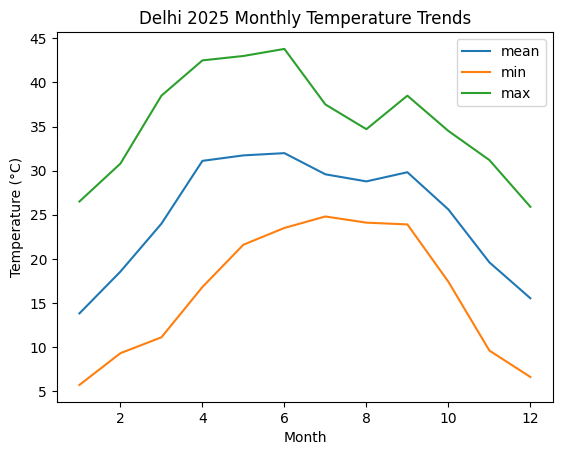

In [ ]:
monthly_temp.plot()
plt.title("Delhi 2025 Monthly Temperature Trends")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.show()


In [ ]:
monthly_aqi = df.groupby('month')['aqi_index'].mean()
monthly_aqi


,aqi_index
month,
1,189.234543
2,154.921131
3,560.311828
4,541.910417
5,582.764113
6,383.917361
7,147.824597
8,223.970430
9,123.890972


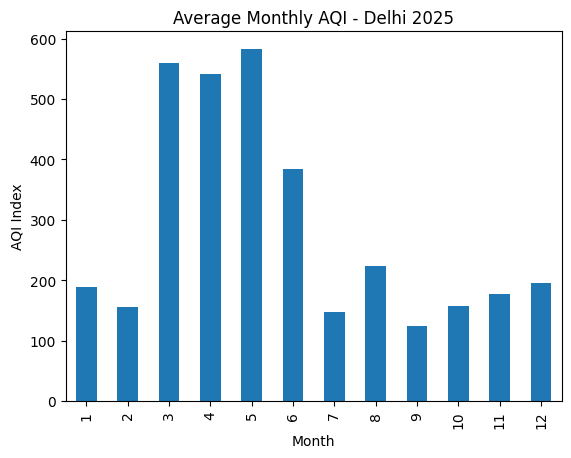

In [ ]:
monthly_aqi.plot(kind='bar')
plt.title("Average Monthly AQI - Delhi 2025")
plt.xlabel("Month")
plt.ylabel("AQI Index")
plt.show()


In [ ]:
corr = df[['temp_c', 'humidity', 'windspeed_kph', 'aqi_index']].corr()
corr


,temp_c,humidity,windspeed_kph,aqi_index
temp_c,1.000000,-0.511204,0.216185,0.192220
humidity,-0.511204,1.000000,-0.265569,-0.330126
windspeed_kph,0.216185,-0.265569,1.000000,0.233777
aqi_index,0.192220,-0.330126,0.233777,1.000000


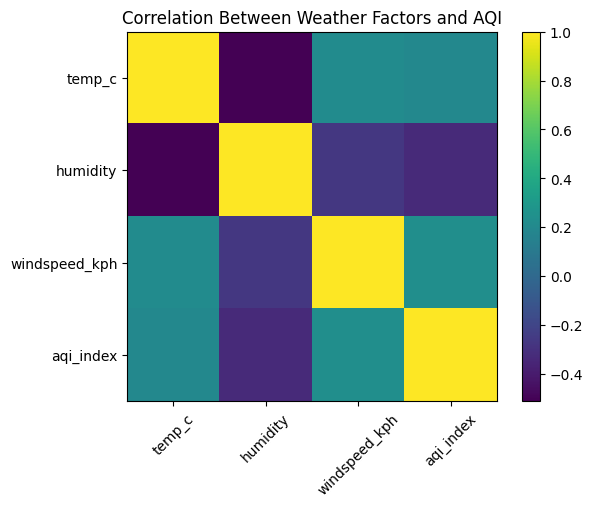

In [ ]:
plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=45)
plt.yticks(range(len(corr)), corr.columns)
plt.title("Correlation Between Weather Factors and AQI")
plt.show()


In [ ]:
df['hour'] = df['datetime'].dt.hour


In [ ]:
hourly_aqi = df.groupby('hour')['aqi_index'].mean()
hourly_aqi


,aqi_index
hour,
0,285.561644
1,285.560274
2,285.721918
3,285.857534
4,285.915068
5,286.013699
6,286.046575
7,286.054795
8,286.136986


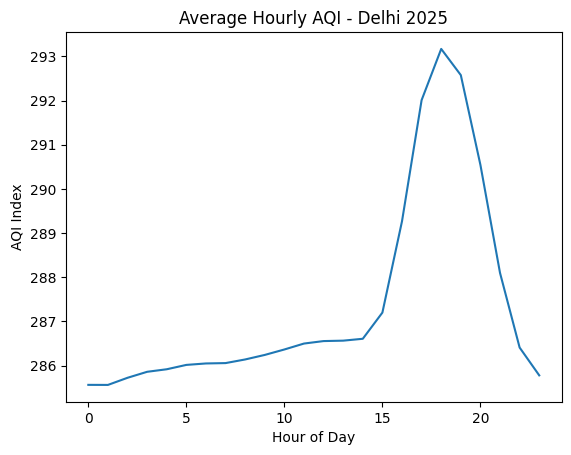

In [ ]:
hourly_aqi.plot()
plt.title("Average Hourly AQI - Delhi 2025")
plt.xlabel("Hour of Day")
plt.ylabel("AQI Index")
plt.show()


In [ ]:
pm_avg = df[['pm2_5', 'pm10']].mean()
pm_avg


,0
pm2_5,89.542432
pm10,300.462700


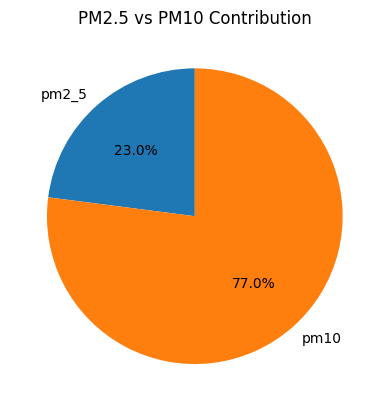

In [ ]:
pm_avg.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90
)
plt.title("PM2.5 vs PM10 Contribution")
plt.ylabel("")
plt.show()


In [1]:
# 1. Save CSV in Colab environment
df.to_csv("delhi-weather-aqi-2025.csv", index=False)

# 2. Download to your local system
from google.colab import files
files.download("delhi-weather-aqi-2025.csv")


NameError: name 'df' is not defined